In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, firwin

### Amplitude modulation

In [290]:
# Modulating signal
fpr = 100
tmax = 10
t = np.linspace(0,tmax,fpr*tmax)
A = 1
f = 1
w = 2*np.pi*f
x_t = A * np.sin(2*np.pi*f*t)

fdomain = np.linspace(-fpr/2,fpr/2,fpr*tmax)

# Modulating constant
k = 0.5

# Carrier Signal
A0 = 5
f0 = 5
w0 = 2*np.pi*f0

#### Double SideBand-SurpressedCarrier (DSB-SC)

In [291]:
# Time domain DSB-SC signal
phi_dsbsc_t = k * A0 * x_t * np.cos(2*np.pi*f0*t)
e_dsb_sc = k * A0 * np.abs(x_t)

# Frequency domain DSB-SC signal
PHI_DSBSC_w = np.fft.fftshift(np.fft.fft(phi_dsbsc_t))
X_w = np.fft.fftshift(np.fft.fft(x_t))

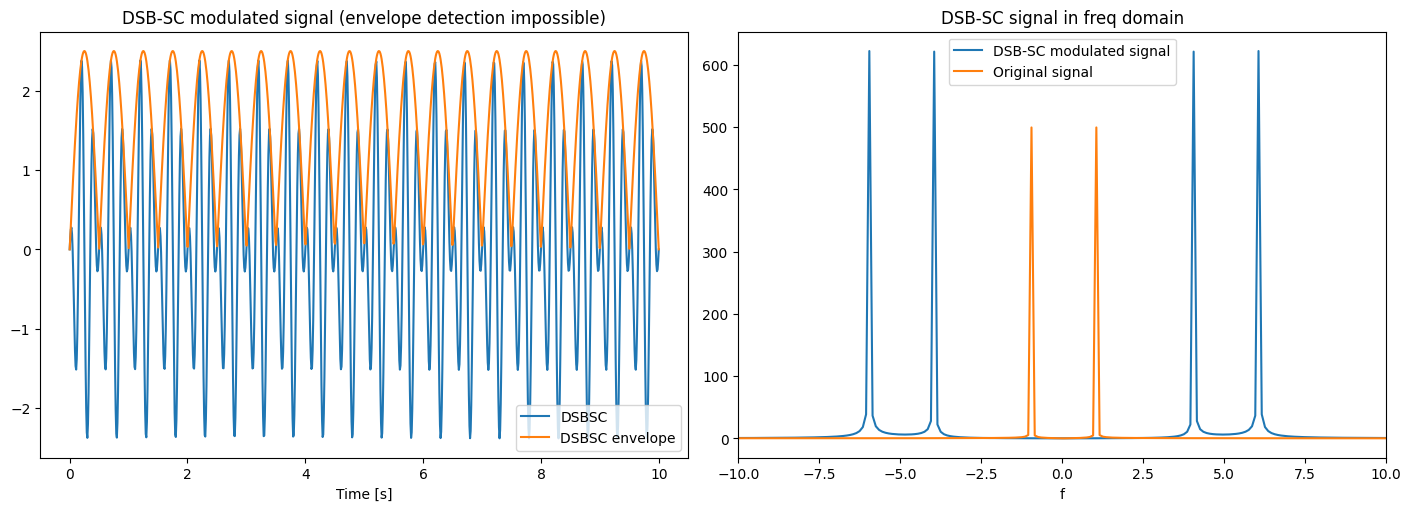

In [293]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

ax[0].plot(t, phi_dsbsc_t,label="DSBSC")
ax[0].plot(t, e_dsb_sc,label="DSBSC envelope")
ax[0].set_title("DSB-SC modulated signal (envelope detection impossible)")
ax[0].set_xlabel("Time [s]")
ax[0].legend()

ax[1].plot(fdomain,(np.abs(PHI_DSBSC_w)),label="DSB-SC modulated signal")
ax[1].plot(fdomain,(np.abs(X_w)),label="Original signal")
ax[1].set_title("DSB-SC signal in freq domain")

ax[1].set_xlim((-10,10))
ax[1].set_xlabel("f")
ax[1].legend()
plt.show()

0.024


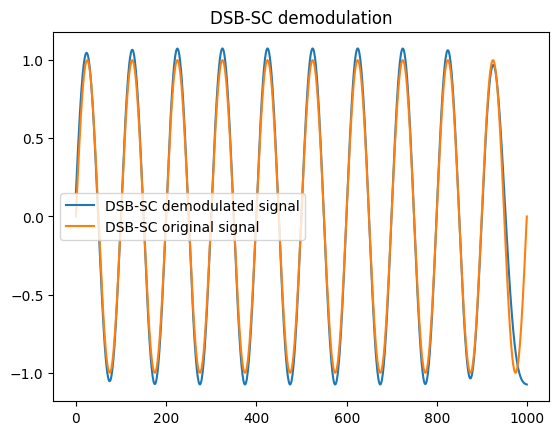

In [319]:
# DSB-SC demodulation
dsbc_demod = phi_dsbsc_t * np.cos(w0*t)

B = 1.2*f      # message bandwidth
b, a = butter(5, B/(fpr/2))
x_rec = filtfilt(b, a, dsbc_demod)

plt.plot(x_rec, label="DSB-SC demodulated signal")
plt.plot(x_t, label="DSB-SC original signal")
plt.title("DSB-SC demodulation")
plt.legend()
plt.show()

#### AM Modulation (DSB-LC)

In [325]:
# Time domain DSB-LC signal
phi_dsblc_t = A0 * (1+k*x_t)*np.cos(2*np.pi*f0*t)
e_dsb_lc = A0 * (1+k*x_t)

# Frequency domain DSB-SC signal
PHI_DSBLC_w = np.fft.fftshift(np.fft.fft(phi_dsblc_t))
X_w = np.fft.fftshift(np.fft.fft(x_t))

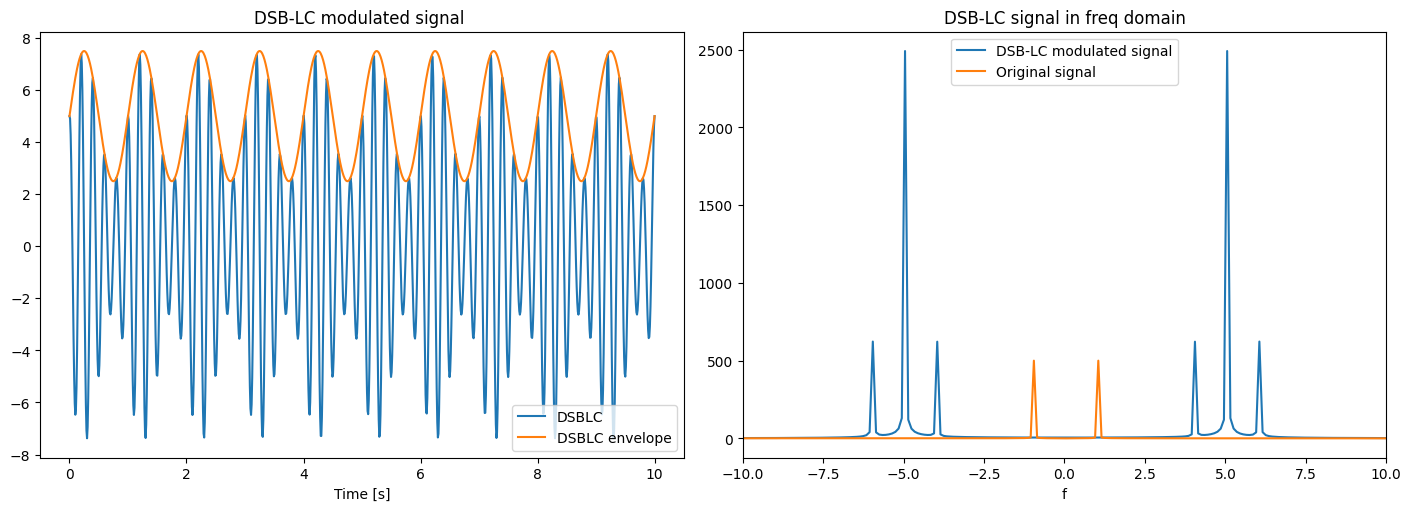

In [327]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

ax[0].set_title("DSB-LC modulated signal ")
ax[0].plot(t, phi_dsblc_t,label="DSBLC")
ax[0].plot(t, e_dsb_lc,label="DSBLC envelope")
ax[0].set_xlabel("Time [s]")
ax[0].legend()

ax[1].plot(fdomain,(np.abs(PHI_DSBLC_w)),label="DSB-LC modulated signal")
ax[1].plot(fdomain,(np.abs(X_w)),label="Original signal")
ax[1].set_title("DSB-LC signal in freq domain")

ax[1].set_xlim((-10,10))
ax[1].set_xlabel("f")
ax[1].legend()
plt.show()

#### SSB-SC modulation

In [344]:
# Time domain SSB-SC signal
x_prim = A * np.sin(2*np.pi*f*t-np.pi/2)
phi_ssbsc_t = k*A0*x_t*np.cos(2*np.pi*f0*t) + k*A0*x_prim*np.sin(2*np.pi*f0*t)

# Frequency domain SSB-SC signal
PHI_SSBSC_w = np.fft.fftshift(np.fft.fft(phi_ssbsc_t))
X_w = np.fft.fftshift(np.fft.fft(x_t))

# Envelope detection - NOT POSSIBLE, COHERENT DETECTION APPLIED
e_ssb_sc = A0 * (1+k*x_t) * np.sqrt(1 + np.pow((k*x_prim/(1+k*x_t)),2))

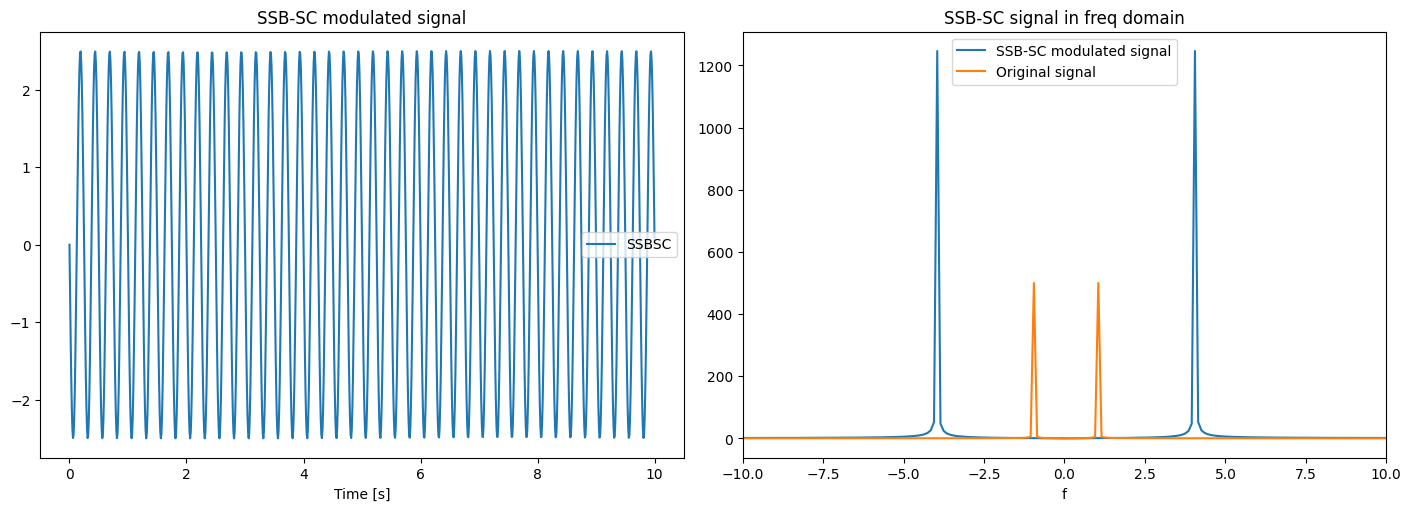

In [346]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

ax[0].set_title("SSB-SC modulated signal")
ax[0].plot(t, phi_ssbsc_t,label="SSB-SC signal")
ax[0].set_xlabel("Time [s]")
ax[0].legend()

ax[1].plot(fdomain,(np.abs(PHI_SSBSC_w)),label="SSB-SC modulated signal")
ax[1].plot(fdomain,(np.abs(X_w)),label="Original signal")
ax[1].set_title("SSB-SC signal in freq domain")
ax[1].set_xlim((-10,10))
ax[1].set_xlabel("f")
ax[1].legend()
plt.show()

#### VSB-SC modulation

In [404]:
# Time domain VSB-SC signal
N_taps = 100
Bv = 0.0009 * B
f1 = B - Bv     # start of ramp
f2 = B + Bv     # end of ramp
f_pass = [f1/(fpr/2), f2/(fpr/2)]
vsb_fir = firwin(N_taps, f_pass, pass_zero=False)

x_q = np.convolve(x_t, vsb_fir, mode='same')
phi_vsbsc_t = k*A0*x_t*np.cos(2*np.pi*f0*t) - k*A0*x_q*np.sin(2*np.pi*f0*t)
PHI_VSBSC_w = np.fft.fftshift(np.fft.fft(phi_vsbsc_t))

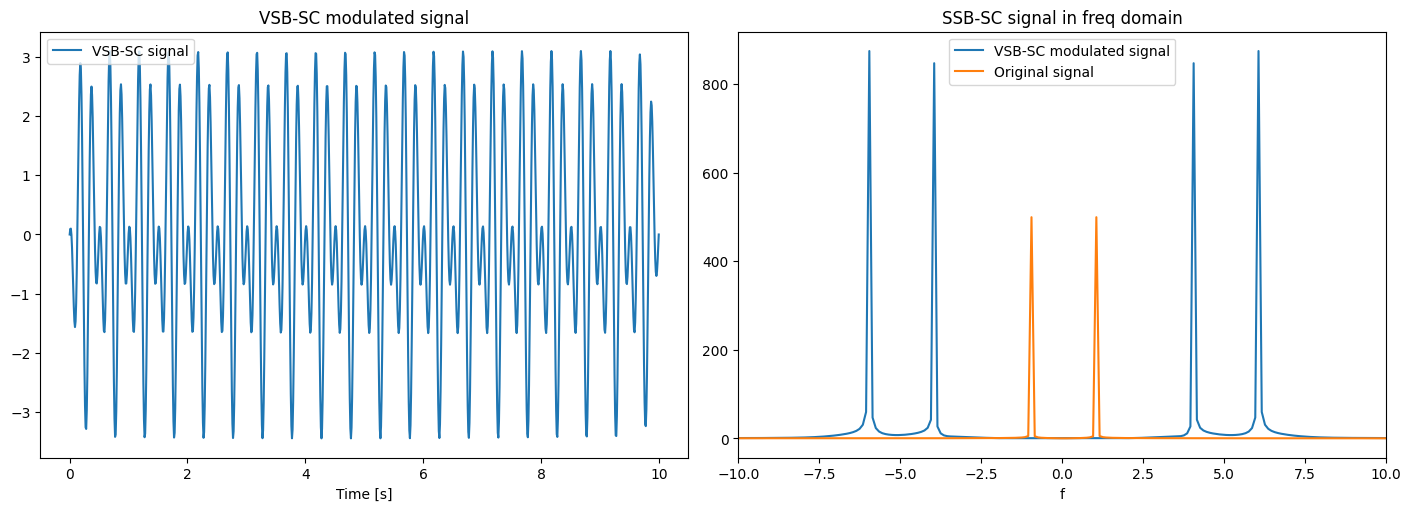

In [405]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

ax[0].set_title("VSB-SC modulated signal")
ax[0].plot(t, phi_vsbsc_t,label="VSB-SC signal")
ax[0].set_xlabel("Time [s]")
ax[0].legend()

ax[1].plot(fdomain,(np.abs(PHI_VSBSC_w)),label="VSB-SC modulated signal")
ax[1].plot(fdomain,(np.abs(X_w)),label="Original signal")
ax[1].set_title("SSB-SC signal in freq domain")
ax[1].set_xlim((-10,10))
ax[1].set_xlabel("f")
ax[1].legend()
plt.show()